### Import libraries

In [2]:
import pandas as pd
import numpy as np

### Load csv data from git repo

Clone the official Johns Hopkins University git repository with data from here: https://github.com/CSSEGISandData/COVID-19 	
**Pay attention where your Johns Hopkins data is located and modify the path accordingly.**
**Here we will analyse historic data from 03/13/2020**

In [3]:
df = pd.read_csv("johnshopkins_data/03_13_2020_time_series_19-covid-Confirmed.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,43,47,48,50,50,50,53,59,70,75
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,331,360,420,461,502,511,581,639,639,701
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,110,117,130,138,150,150,160,178,178,200
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,50,83,93,99,117,129,149,149,197


### Import plot libs and chart Germany and Italy cases starting from 1/22/2020

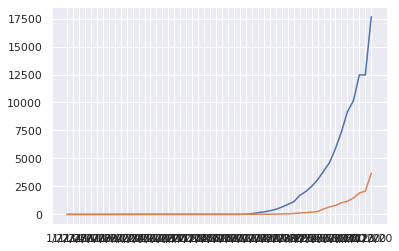

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

plt.plot(df[df['Country/Region'] == 'Italy'].iloc[0, 4:], '-', label='Cases')
plt.plot(df[df['Country/Region'] == 'Germany'].iloc[0, 4:], '-', label='Cases')


### Select Europe by coordinates, plot all European countries from 1/22/2020

Text(0, 0.5, 'Cases')

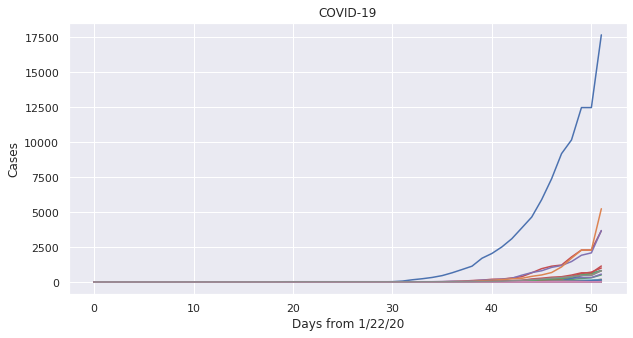

In [9]:
europe = df[(df['Lat'] > 30) & (df['Long'] > -10) & (df['Long'] < 40)]
europe = europe.groupby(['Country/Region']).sum()
n_countries = len(europe)

europe.reset_index(inplace=True)

plt.figure(figsize=(10,5))

x = range(0, len(europe.iloc[0, 3:]))

for i in range(n_countries):
    plt.plot(x, europe[europe.columns[3:]].loc[i])
    

plt.title('COVID-19')
plt.xlabel('Days from 1/22/20')
plt.ylabel('Cases')


### Plot all European countries on logarithmic scale

Text(0, 0.5, 'Cases')

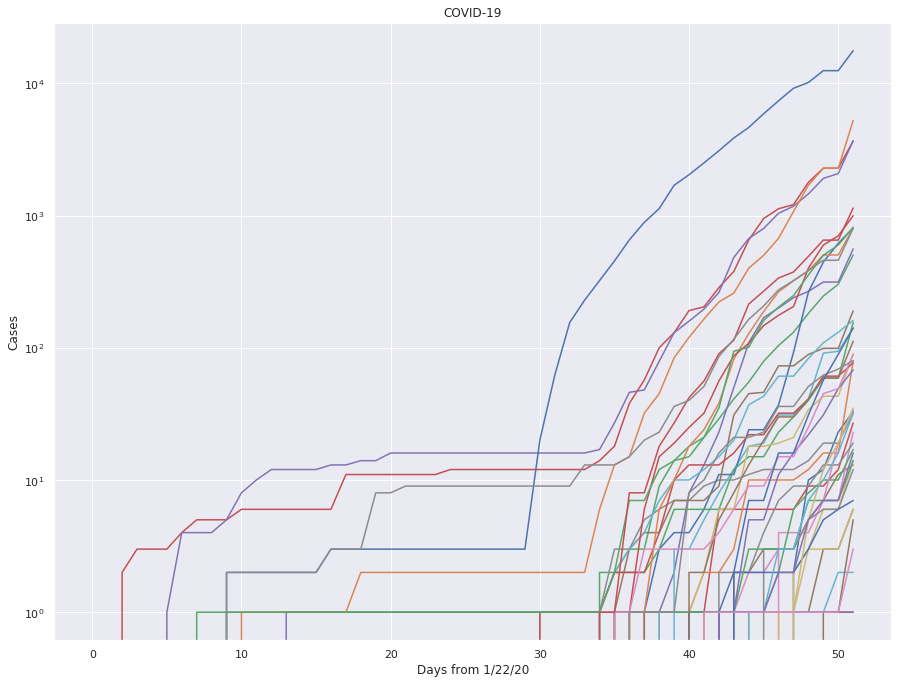

In [10]:
fig = plt.figure(figsize=(15,25))
myplot = fig.add_subplot(2, 1, 1)
myplot.set_yscale('log')

x = range(0, len(europe.iloc[0, 3:]))

for i in range(n_countries):
    myplot.plot(x, europe[europe.columns[3:]].loc[i])
    

plt.title('COVID-19')
plt.xlabel('Days from 1/22/20')
plt.ylabel('Cases')


### Tanspose the matrix

In [11]:
europeT = europe.T

In [12]:
europeT.head(8)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Country/Region,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,Czechia,...,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Tunisia,Turkey,Ukraine,United Kingdom
Lat,41.1533,42.5063,47.5162,53.7098,50.8333,43.9159,42.7339,45.1,35.1264,49.8175,...,44.0165,48.669,46.1512,40,63,46.8182,34,38.9637,48.3794,140.891
Long,20.1683,1.5218,14.5501,27.9534,4,17.6791,25.4858,15.2,33.4299,15.473,...,21.0059,19.699,14.9955,-4,16,8.2275,9,35.2433,31.1656,-11.154
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Drop coordinates

In [13]:
europeT.drop('Lat', inplace=True)
europeT.drop('Long', inplace=True)


In [14]:
europeT.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Country/Region,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,Czechia,...,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Tunisia,Turkey,Ukraine,United Kingdom
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Reset index

In [15]:
europeT.reset_index(inplace=True)

In [16]:
europeT.head()

,index,0,1,2,3,4,5,6,7,8,...,38,39,40,41,42,43,44,45,46,47
0,Country/Region,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,...,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Tunisia,Turkey,Ukraine,United Kingdom
1,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Set the first row with countries as columns' names

In [17]:
europeT.columns = europeT.loc[0]

In [18]:
europeT.head()

,Country/Region,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,...,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Tunisia,Turkey,Ukraine,United Kingdom
0,Country/Region,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,...,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Tunisia,Turkey,Ukraine,United Kingdom
1,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Drop the first row with countries

In [19]:
europeT.drop(0, inplace=True)

In [20]:
europeT.head()

,Country/Region,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,...,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Tunisia,Turkey,Ukraine,United Kingdom
1,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Drop 'Country/Region' column

In [21]:
europeT.drop(columns=['Country/Region'], inplace=True)

In [22]:
europeT.head()

,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,Czechia,...,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Tunisia,Turkey,Ukraine,United Kingdom
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Generate 30% growth trendline
We do this to have a reference 30% growth trendline in the chart. We will use it for visual reference when analyzing cases by country.

In [23]:
start = 50
growth_rate = 30 # %
trendline = [start]
for i in range(len(europeT) - 1):
    trendline.append(trendline[i] * (100 + growth_rate)/100)

### Plot all European countries on logarithmic scale, marking Germany with dots. 0 on X axis corresponds to the first 50 recorded cases in the country.

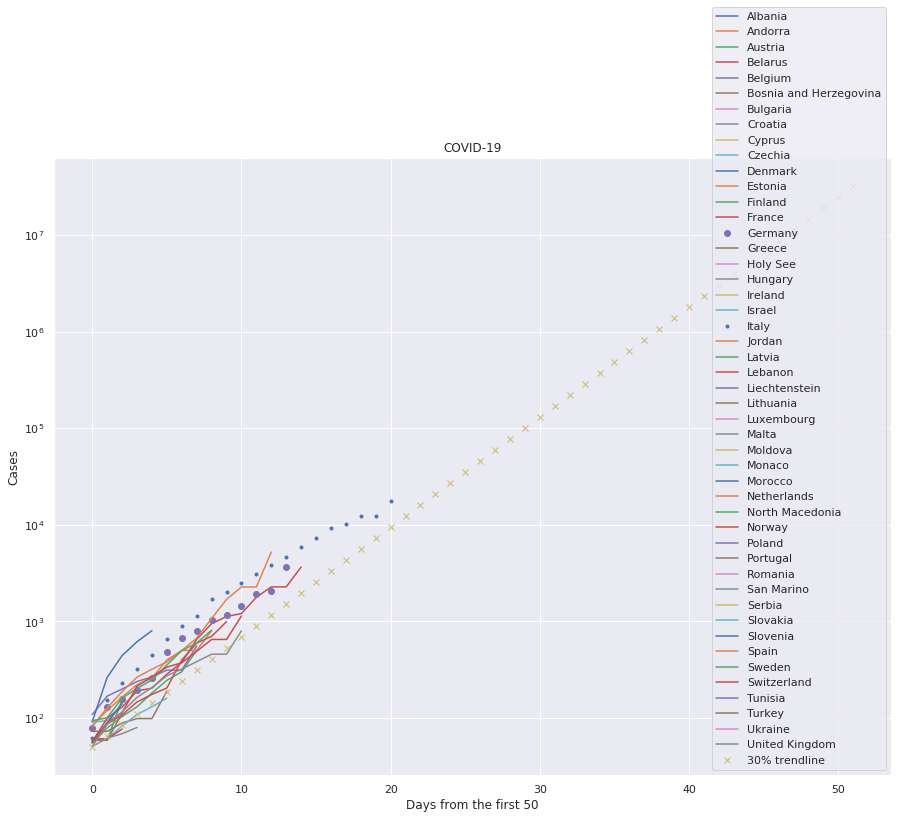

In [24]:
fig = plt.figure(figsize=(15,25))
myplot = fig.add_subplot(2, 1, 1)
myplot.set_yscale('log')

min_reported_cases = 50

x = range(0, len(europeT))

for country in europeT:
    country_surged = europeT[europeT[country] > min_reported_cases][country]
    zz = pd.Series(np.full(len(europeT[country]) - len(country_surged), None))
    ch = '-'
    if country == 'Germany':
        ch = 'o'
    if country == 'Italy':
        ch = '.'
    myplot.plot(x, country_surged.append(zz), ch, label=country)
    
myplot.plot(trendline, 'x', label="30% trendline")
    
plt.title('COVID-19')
plt.xlabel(f'Days from the first {min_reported_cases}')
plt.ylabel('Cases')
plt.legend(loc='lower right')

### Plot case growth in Germany from the first case

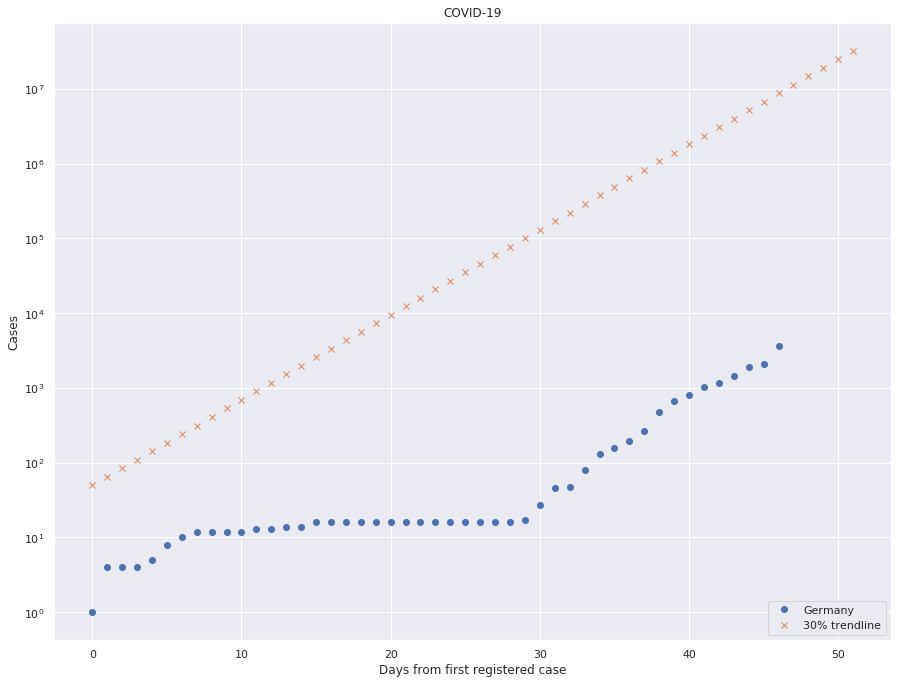

In [25]:
fig = plt.figure(figsize=(15,25))
myplot = fig.add_subplot(2, 1, 1)
myplot.set_yscale('log')

x = range(0, len(europeT))

for country in europeT:
    country_surged = europeT[europeT[country] > 0][country]
    zz = pd.Series(np.full(len(europeT[country]) - len(country_surged), None))
    ch = '-'
    if country == 'Germany':
        ch = 'o'
        myplot.plot(x, country_surged.append(zz), ch, label=country)
    
myplot.plot(trendline, 'x', label="30% trendline")
    
plt.title('COVID-19')
plt.xlabel('Days from first registered case')
plt.ylabel('Cases')
plt.legend(loc='lower right')

## Lockdown forecast based on ratio of population to reported cases

For further steps we will need data on population in countries worldwide. Download it from UN website from the following link:
https://population.un.org/wpp/Download/Standard/CSV/ 	
We need "Total Population All variants (CSV, 21.35 MB)" file. Direct link to file: https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv 	
Modify the path to the file accordingly.

In [26]:
df_pop = pd.read_csv("https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv") # UN CSV path
df_pop.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


### Data cleaning	
We drop everything except the latest population.

In [27]:
df_pop.drop(columns=['VarID', 'PopFemale', 'PopMale', 'Variant', 'LocID', 'PopDensity', 'MidPeriod'], inplace=True)
df_pop.head()

,Location,Time,PopTotal
0,Afghanistan,1950,7752.117
1,Afghanistan,1951,7840.151
2,Afghanistan,1952,7935.996
3,Afghanistan,1953,8039.684
4,Afghanistan,1954,8151.316


In [28]:
df_pop = df_pop[df_pop.Time == 2020]

We aggregate different regions of the same country and different estimations to one. Our goal is: One country - One number. We use Median as an aggregation function.

In [29]:
df_pop = df_pop.groupby(['Location']).median()

In [30]:
df_pop.drop(columns=['Time'], inplace=True)

In [31]:
df_pop.head()

,PopTotal
Location,
Afghanistan,38928.341
Africa,1340598.113
African Group,1338826.591
African Union,1339423.921
African Union: Central Africa,158619.638


### Define baseline when a total country lockdown (curfew) was implemented in Italy.	
This will give us a ratio of registered COVID-19 cases to population in the country.

In [32]:
from datetime import datetime, timedelta
# 2/20/2020 - 50+ cases
# 3/10/2020 - lockdown nationwide, with 10149 cases

baseline_cases = 10149
baseline_date = datetime.strptime('3/10/2020', '%m/%d/%Y')

baseline_ratio = (baseline_cases / df_pop.loc['Italy'])[0]

Assuming that governments across the world behave similarly (sometimes they don't), we can estimate when another country will get similar restrictions as in Italy.	
	
Select the last known date for the country as "today" 
```python
today = europeT[country_name].iloc[-1]
```
Identify the current ratio of registered cases to population. If you get an error this is probably because the country you specified is called differently in UN dataset. For example, China could be called People's Republic of China.
```python
ratio = (today / df_pop.loc[country_name])[0]
```
We take the last known date from the dataset for the selected country
```python
lockdown_date = datetime.strptime(df.columns[-1], '%m/%d/%y')
```
Further we update our variables as long as the ratio stays smaller than in Italy on the day of lockdown. The variable ```today``` is an extrapolation of 30% growth.

In [39]:
country_name = 'France'
today = europeT[country_name].iloc[-1]
ratio = (today / df_pop.loc[country_name])[0]
lockdown_date = datetime.strptime(df.columns[-1], '%m/%d/%y')


while ratio < baseline_ratio:
    today = today * (100 + growth_rate)/100
    ratio = (today / df_pop.loc[country_name])[0]
    lockdown_date += timedelta(days=1)
    print(lockdown_date.date(), today)


2020-03-14 4759.3
2020-03-15 6187.09
2020-03-16 8043.217000000001
2020-03-17 10456.1821
2020-03-18 13593.03673


Our result. If you don't get any or you get yesterday, it might be because the lockdown date is already in the past. Analyze the results you've got from the loop above.

In [40]:
print(f'Lockdown date for {country_name}', lockdown_date.date())

Lockdown date for France 2020-03-18
